# Unsupervised outliers detection (mixture of data)

In [1]:
import drama as drm
import numpy as np
import matplotlib.pylab as plt
from matplotlib import gridspec

%matplotlib inline

## Signal synthesis

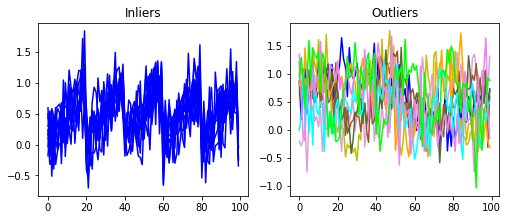

In [4]:
i_sig = 2
n_ftrs = 100
noise = 0.3
scl = 0.0
sft = 0.0

x = np.linspace(0,1,n_ftrs)

X, y = drm.synt_mix(i_sig,n_ftrs,x=x,sigma = noise,n1 = scl,n2 = sft,n3 = scl,n4 = sft)

gs = gridspec.GridSpec(1, 2)
plt.figure(figsize=(8,3)) 
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])
ax1.set_title('Inliers')
ax2.set_title('Outliers')

inliers = X[y==i_sig]
outliers = X[y!=i_sig]
outliers_y = y[y!=i_sig]

for i in range(0,45,5):
    ax1.plot(inliers[i],'b')
    ax2.plot(outliers[i],drm.COLORS[outliers_y[i]])
    
plt.subplots_adjust(hspace=0.3,left=0.1, right=0.9, top=0.9, bottom=0.1)

## Outlier detection

In [5]:
n_try = 5

result = []
for i in range(n_try):
    res = drm.unsupervised_outlier_finder_all(X)
    arr,drts,metrs = drm.result_array(res,y,'real')
    result.append(arr)
result = np.array(result)

/home/gf/packages/anaconda2/lib/python2.7/site-packages/scipy/spatial/distance.py:543: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - np.dot(um, vm) / (norm(um) * norm(vm))


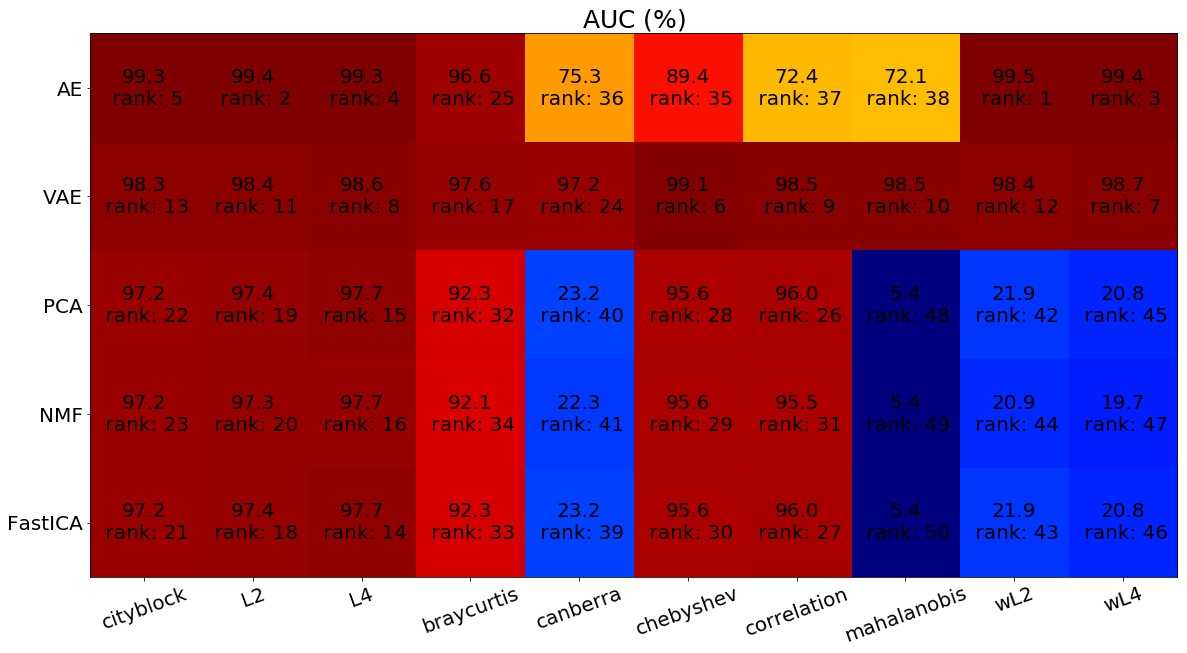

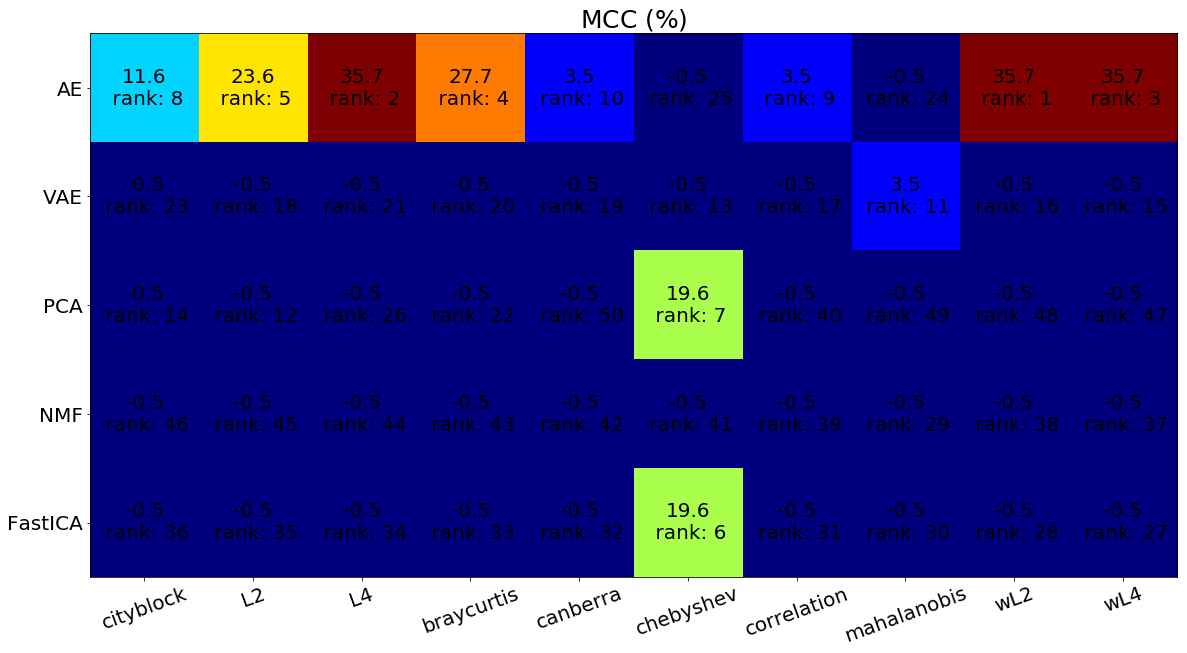

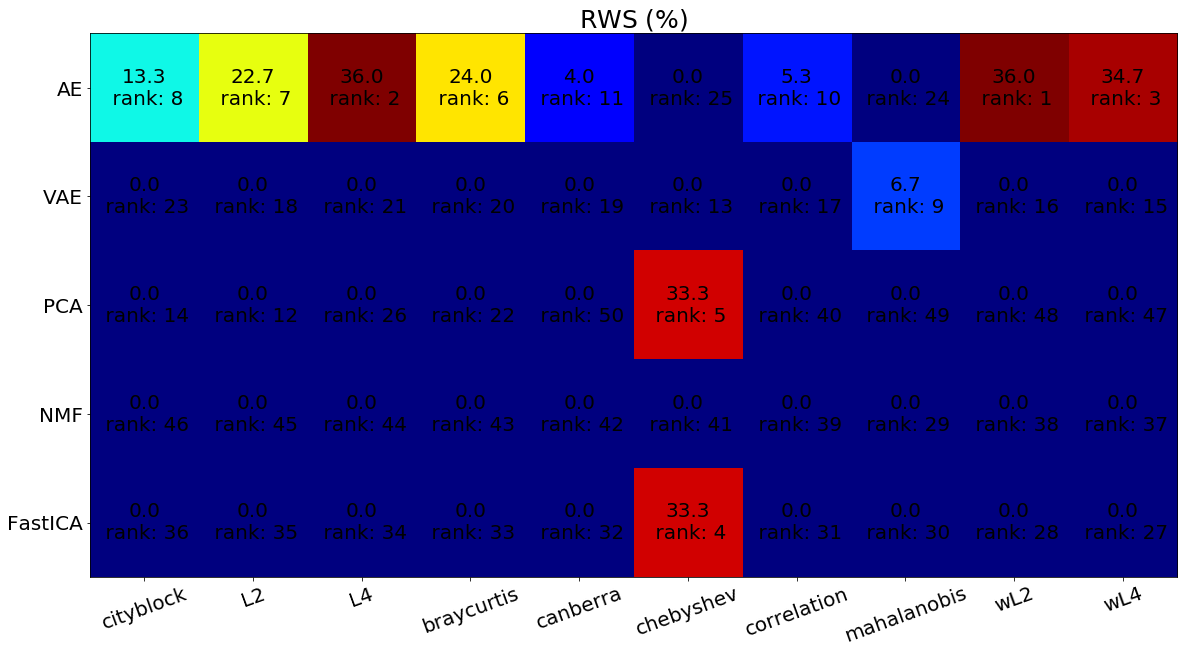

In [6]:
drm.plot_table(np.mean(result,axis=0),drts,metrs)

In [8]:
lof_all = np.zeros((n_try,3))
ifr_all = np.zeros((n_try,3))
df = drm.sk_check(X,X,y,[1])
for i in range(n_try):
    for j,scr in enumerate(['AUC','MCC','RWS']):
        lof_all[i,j] = df[scr][0]
        ifr_all[i,j] = df[scr][1]

Text(0,-30,u'** Colors depend on AUC.')

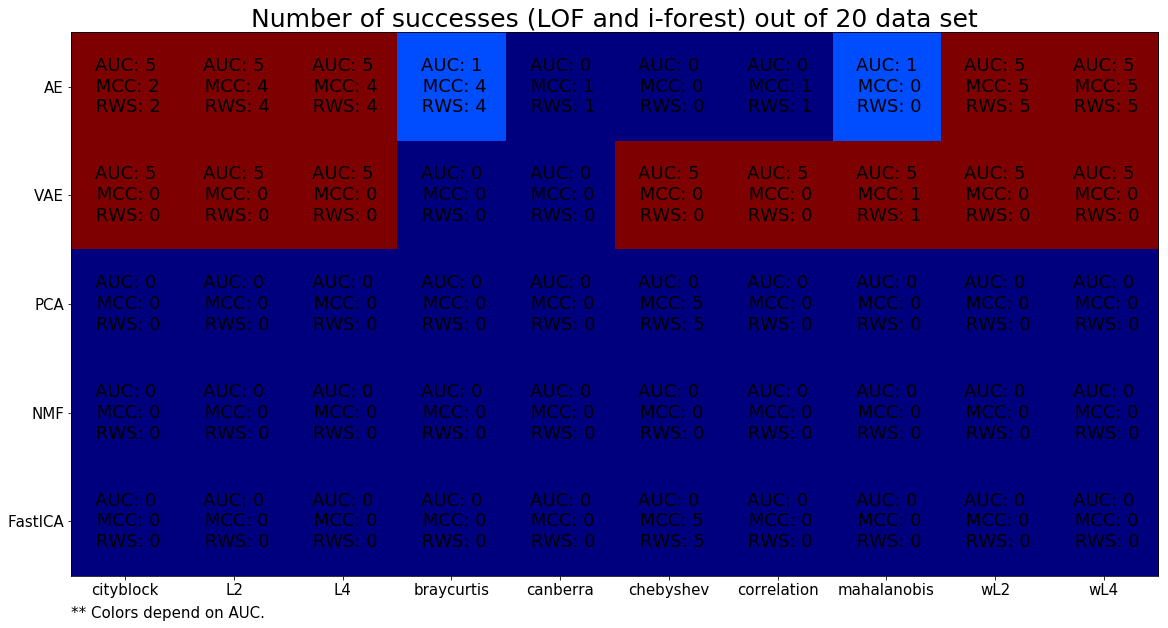

In [10]:
auc = np.sum((result[:, :, :, 0].T>lof_all[:, 0]) & (result[:, :, :, 0].T>ifr_all[:, 0]),axis=-1).T
mcc = np.sum((result[:, :, :, 1].T>lof_all[:, 1]) & (result[:, :, :, 1].T>ifr_all[:, 1]),axis=-1).T
rws = np.sum((result[:, :, :, 2].T>lof_all[:, 2]) & (result[:, :, :, 2].T>ifr_all[:, 2]),axis=-1).T

fig = plt.figure(figsize=(20,10))
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect('auto')
res = ax.imshow(auc, cmap=plt.cm.jet,interpolation='nearest')

width, height = auc.shape

for x in xrange(width):
    for y in xrange(height):
        ax.annotate('AUC: {:d}\n MCC: {:d}\n RWS: {:d}'.format(auc[x][y],mcc[x][y],rws[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center',fontsize=18);

plt.xticks(range(10),metrs,fontsize=15)
plt.yticks(range(5), drts,fontsize=15)

plt.title('Number of successes (LOF and i-forest) out of 20 data set',fontsize=25)
plt.annotate('** Colors depend on AUC.', (0,0), (0, -30), xycoords='axes fraction',
             textcoords='offset points', va='top',fontsize=15)

# plt.savefig('AND_success.jpg',dpi=150,bbox_inches='tight')